## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [288]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [289]:
df = pd.read_csv('housing.csv')
df.dropna(inplace=True)
df.rename(columns={
    'longitude': 'longitude',
    'latitude': 'latitude',
    'housing_median_age': 'idade_mediana_das_residências',
    'total_rooms': 'total_de_cômodos',
    'total_bedrooms': 'total_de_quartos',
    'population': 'população',
    'households': 'domicílios',
    'median_income': 'renda_mediana',
    'median_house_value': 'valor_mediano_das_residências',
    'ocean_proximity': 'proximidade_do_oceano'
}, inplace=True)

In [290]:
df

,longitude,latitude,idade_mediana_das_residências,total_de_cômodos,total_de_quartos,população,domicílios,renda_mediana,valor_mediano_das_residências,proximidade_do_oceano
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [291]:
x = df.drop(columns = ['proximidade_do_oceano','valor_mediano_das_residências','longitude','latitude']).copy()
y = df[['valor_mediano_das_residências']]

In [292]:
x.head()

,idade_mediana_das_residências,total_de_cômodos,total_de_quartos,população,domicílios,renda_mediana
0,41.0,880.0,129.0,322.0,126.0,8.3252
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,52.0,1467.0,190.0,496.0,177.0,7.2574
3,52.0,1274.0,235.0,558.0,219.0,5.6431
4,52.0,1627.0,280.0,565.0,259.0,3.8462


In [293]:
y.head()

,valor_mediano_das_residências
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [294]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2507)
print('X_train:', x_train.shape)
print('X_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (15324, 6)
X_test: (5109, 6)
y_train: (15324, 1)
y_test: (5109, 1)


In [295]:
regr = DecisionTreeRegressor(max_depth=8,random_state = 2507)
regr.fit(x_train, y_train)

y_train_pred = regr.predict(x_train)
y_test_pred = regr.predict(x_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print('Treino: ',mse_train)
print('Treino: ',mse_test)

Treino:  4765572940.607695
Treino:  5841790612.1215105


In [296]:
novo_imovel = [41.0	,880.0	,129.0	,322.0,	126.0	,8.3252]
previsao = regr.predict([novo_imovel])
print('Previsão: ',previsao);

Previsão:  [488852.8]


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [297]:
r2_1_train = regr.score(X=x_train, y=y_train)

r2_1_test = regr.score(X=x_test, y=y_test)

template = 'O coeficiente de determinação (R-quadrado) da árvore com profundidade = {0} para a base de {1} é: {2:.2f}'

print(template.format(regr.get_depth(), 'treino', r2_1_train).replace(".", ","))
print(template.format(regr.get_depth(), 'teste', r2_1_test).replace(".", ","), '\n')


O coeficiente de determinação (R-quadrado) da árvore com profundidade = 8 para a base de treino é: 0,64
O coeficiente de determinação (R-quadrado) da árvore com profundidade = 8 para a base de teste é: 0,56 



### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [308]:
path = regr.cost_complexity_pruning_path(x_train, y_train)
ccp_alpha = path.ccp_alphas
ccp_alpha

array([0.00000000e+00, 8.82276168e+02, 6.12405377e+03, 2.41224354e+04,
       3.01540068e+04, 4.08888019e+04, 5.41636213e+04, 6.81503133e+04,
       7.32461093e+04, 1.27455299e+05, 1.50990026e+05, 1.55344558e+05,
       1.62014826e+05, 1.83999608e+05, 2.17259854e+05, 2.19935206e+05,
       2.47003502e+05, 2.98571685e+05, 3.22866218e+05, 3.26292091e+05,
       4.01740407e+05, 4.02272645e+05, 4.11872009e+05, 4.32623626e+05,
       4.35056121e+05, 5.51422605e+05, 5.52345395e+05, 5.90418673e+05,
       7.84098702e+05, 8.25444272e+05, 8.58183351e+05, 8.98639520e+05,
       9.07212886e+05, 9.37024560e+05, 9.57135692e+05, 9.77189385e+05,
       9.89314324e+05, 9.92731765e+05, 9.93344080e+05, 9.95959818e+05,
       1.02414488e+06, 1.04655168e+06, 1.09526695e+06, 1.16106201e+06,
       1.34386909e+06, 1.40411307e+06, 1.47947733e+06, 1.48626895e+06,
       1.55908139e+06, 1.60633589e+06, 1.61826033e+06, 1.63119502e+06,
       1.68108034e+06, 1.68606918e+06, 1.74605898e+06, 1.76865552e+06,
      

Text(0, 0.5, 'Impureza total das folhas')

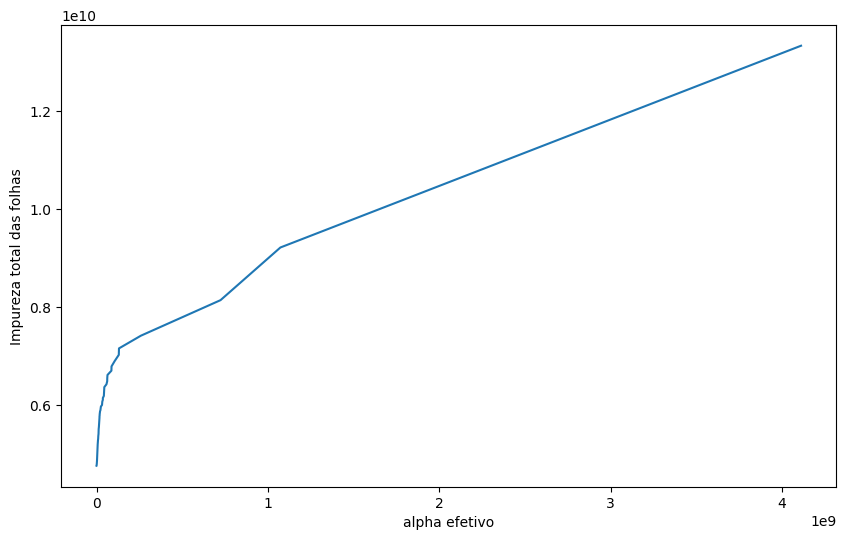

In [299]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, impurities)
plt.xlabel('alpha efetivo')
plt.ylabel('Impureza total das folhas')

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [310]:
arvores= []
for ccp_alphas in ccp_alpha:
  regr = DecisionTreeRegressor(ccp_alpha=ccp_alphas, max_depth=8,random_state=2507)
  regr.fit(x_train, y_train);
  arvores.append(regr)

Text(0, 0.5, 'Profundidade da árvore')

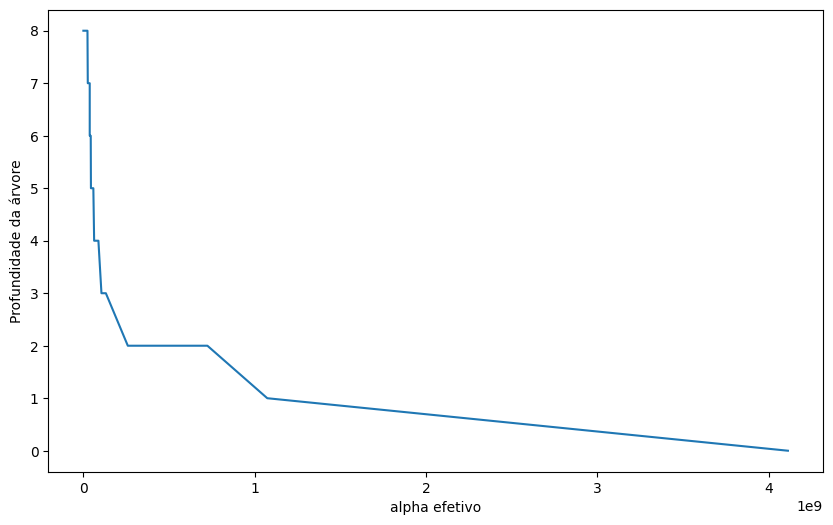

In [311]:
tree_depths = [regr.tree_.max_depth for regr in arvores]
plt.figure(figsize=(10,6))
plt.plot(ccp_alpha, tree_depths)
plt.xlabel('alpha efetivo')
plt.ylabel('Profundidade da árvore')

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [303]:
for arvore in arvores:
  train = mean_squared_error(y_train , arvore.predict(x_train))
  test = mean_squared_error(y_test , arvore.predict(x_test))
  print(train)
  print(test)
  print('---------')

4765572940.607695
5841790612.1215105
---------
4765573822.8838625
5841910714.920492
---------
4765579946.937634
5841495679.199217
---------
4765604069.373052
5841507738.056147
---------
4765634223.379838
5840660417.641192
---------
4765675112.181718
5840660417.641192
---------
4765729275.803052
5839943568.399115
---------
4765797426.116305
5840006738.733824
---------
4765870672.225634
5839806657.081933
---------
4765998127.524511
5844562357.806145
---------
4766149117.55098
5845160054.95444
---------
4766304462.108537
5845160054.95444
---------
4766466476.934358
5845111902.817449
---------
4766650476.542815
5846043413.387032
---------
4766867736.396639
5843498074.279574
---------
4767087671.602884
5850179523.24214
---------
4767334675.105016
5849570328.95537
---------
4767633246.789955
5844539023.9054575
---------
4767956113.00833
5844084479.315023
---------
4768282405.099201
5850935213.313947
---------
4768684145.506406
5849703184.541193
---------
4769086418.151373
5849368722.542832
-

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

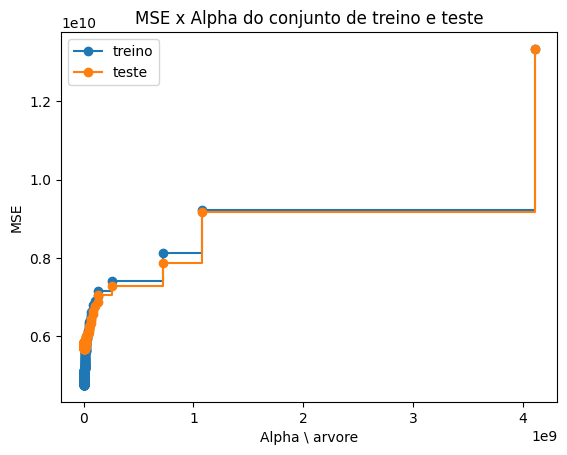

In [312]:
train_scores = [mean_squared_error(y_train , arvore.predict(x_train))for arvore in arvores]
test_scores = [mean_squared_error(y_test , arvore.predict(x_test))for arvore in arvores]
fig, ax = plt.subplots()
ax.set_xlabel('Alpha \ arvore')
ax.set_ylabel('MSE')
ax.set_title('MSE x Alpha do conjunto de treino e teste')
ax.plot(ccp_alpha,train_scores,marker='o',label='treino',drawstyle='steps-post')
ax.plot(ccp_alpha,test_scores,marker='o',label='teste',drawstyle='steps-post')
ax.legend()
plt.show()

In [316]:
arvore_final = DecisionTreeRegressor(random_state=2507 ,ccp_alpha= 2)
arvore_final.fit(x_train,y_train)

print(f'profundidade:{arvore_final.tree_.max_depth}')
print(f'R-quadrado na base de testes:{arvore_final.score(x_test,y_test):.2f}')
print(f'MSE na Base de Teste:{mean_squared_error(y_test,arvore_final.predict(x_test)):.2f}')

profundidade:38
R-quadrado na base de testes:0.32
MSE na Base de Teste:9003797882.79


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [327]:
arvore2 = DecisionTreeRegressor(random_state=2507,max_depth=4, ccp_alpha=2)
arvore2.fit(x_train, y_train);

arvore2.score(x_test, y_test)

0.5314155568190536

### 7. Visualize esta árvore.

[Text(0.5, 0.9, 'x[5] <= 5.144\nsquared_error = 13323750614.505\nsamples = 15324\nvalue = 206964.025'),
 Text(0.25, 0.7, 'x[5] <= 3.074\nsquared_error = 8511885128.778\nsamples = 12351\nvalue = 175505.738'),
 Text(0.125, 0.5, 'x[5] <= 2.337\nsquared_error = 5841530520.961\nsamples = 5827\nvalue = 136896.351'),
 Text(0.0625, 0.3, 'x[4] <= 739.5\nsquared_error = 5108360765.502\nsamples = 2977\nvalue = 118796.982'),
 Text(0.03125, 0.1, 'squared_error = 4486149141.328\nsamples = 2643\nvalue = 113889.6'),
 Text(0.09375, 0.1, 'squared_error = 8333461840.785\nsamples = 334\nvalue = 157629.949'),
 Text(0.1875, 0.3, 'x[0] <= 49.5\nsquared_error = 5907753312.967\nsamples = 2850\nvalue = 155802.253'),
 Text(0.15625, 0.1, 'squared_error = 4993713237.687\nsamples = 2668\nvalue = 150953.191'),
 Text(0.21875, 0.1, 'squared_error = 13909344315.861\nsamples = 182\nvalue = 226886.308'),
 Text(0.375, 0.5, 'x[0] <= 38.5\nsquared_error = 8376342455.364\nsamples = 6524\nvalue = 209990.241'),
 Text(0.3125, 0

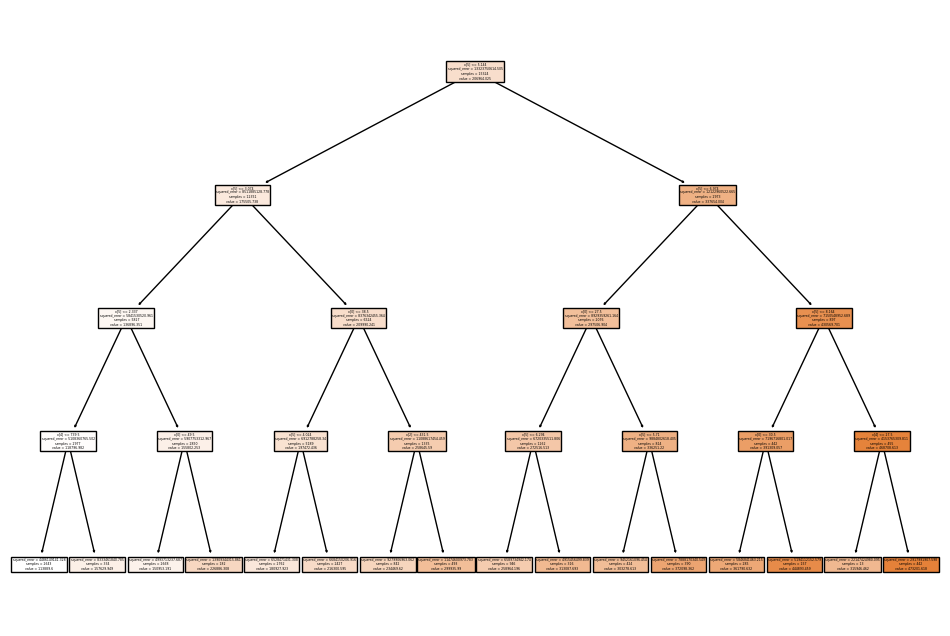

In [329]:
fig, ax = plt.subplots(figsize=(12, 8))
tree.plot_tree(arvore2, filled=True, ax=ax)